##  ALGORITMO DE APRENDIZAJE NO SUPERVISADO

Agrupamiento en Hierarchical Clustering

In [20]:
# Importamos las librerías
import pandas as pd  # manejo y estructura de datos
import numpy as np  # cálculo numérico y el análisis de datos
import seaborn as sns  # creación de gráficos estadísticos
import matplotlib.pyplot as plt  # creación de gráficos en dos dimensiones
import plotly.graph_objs as go  # creación de gráficos en tres dimensiones
import plotly.express as px  # creación de gráficos en tres dimensiones

# Librerías para implementar el modelo KMeans
from sklearn.cluster import AgglomerativeClustering  # algoritmos de agrupamiento o clustering, dividir datos en grupos
from sklearn.preprocessing import StandardScaler  # escalar o normalizar los datos
from scipy.cluster.hierarchy import linkage, dendrogram  # herramientas para realizar agrupamiento jerárquico
# dendrogram: generar gráfico de árbol

# Librerías para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime
import warnings  # Importar warnings para suprimir advertencias

# Suprimir advertencias
warnings.filterwarnings('ignore')


In [29]:
# Insertamos el dataset
dataset = pd.read_csv("Mall_Customers.csv")

# Mostramos las primeras filas del dataset
dataset.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [16]:
# Revisamos el tamaño del dataset, los tipos de variables y la presencia de valores nulos.

# Ver la información del dataset
dataset.info()

# Resumen estadístico de las variables numéricas
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
#Verificamos si hay valores faltantes en el conjunto de datos.

# Revisar los valores nulos en el dataset
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

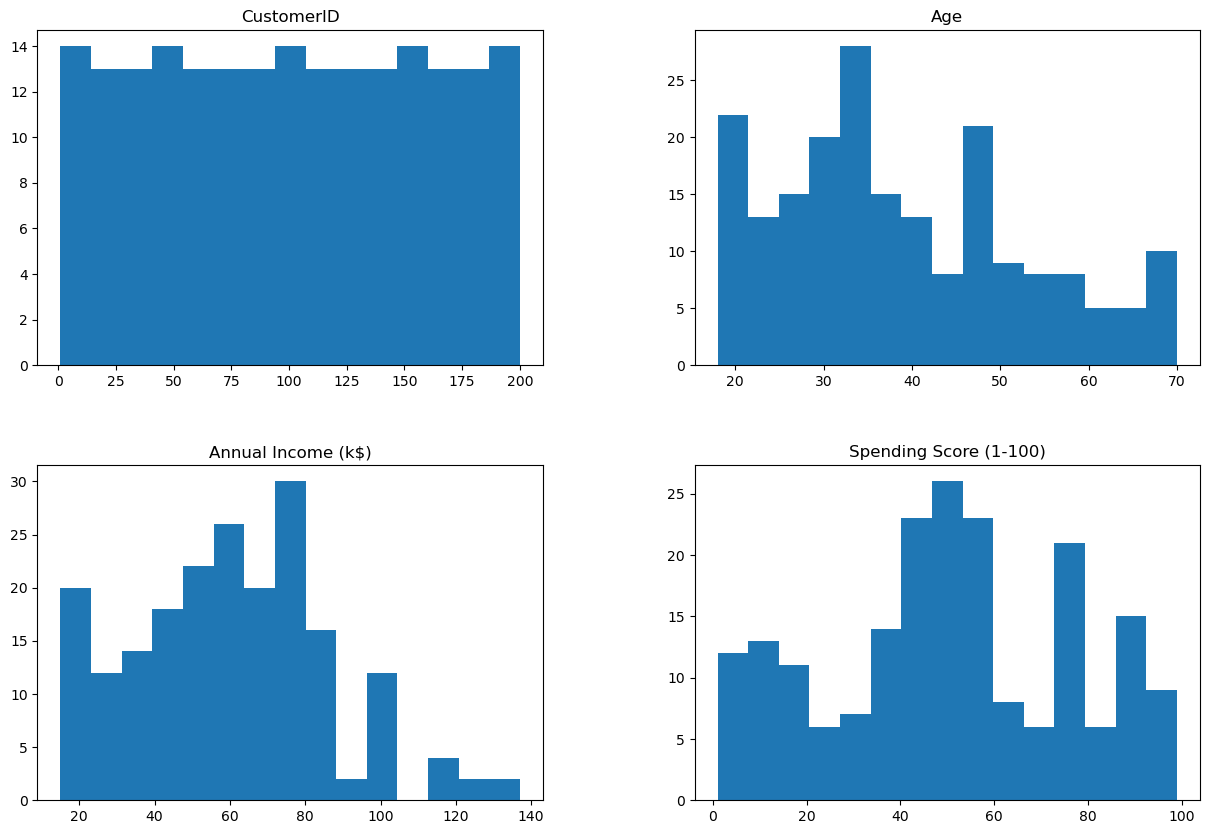

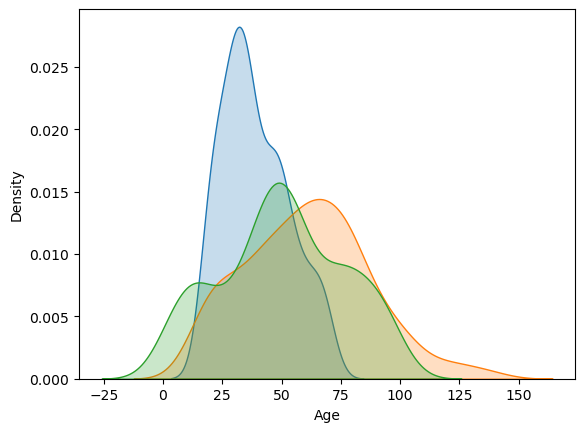

In [18]:
#revisamos las distribuciones de las variables numéricas utilizando histogramas y gráficas de densidad.

# Histograma para ver la distribución de cada variable
dataset.hist(bins=15, figsize=(15, 10), grid=False)
plt.show()

# Usar seaborn para gráficos de densidad (KDE)
sns.kdeplot(dataset['Age'], shade=True)
sns.kdeplot(dataset['Annual Income (k$)'], shade=True)
sns.kdeplot(dataset['Spending Score (1-100)'], shade=True)
plt.show()

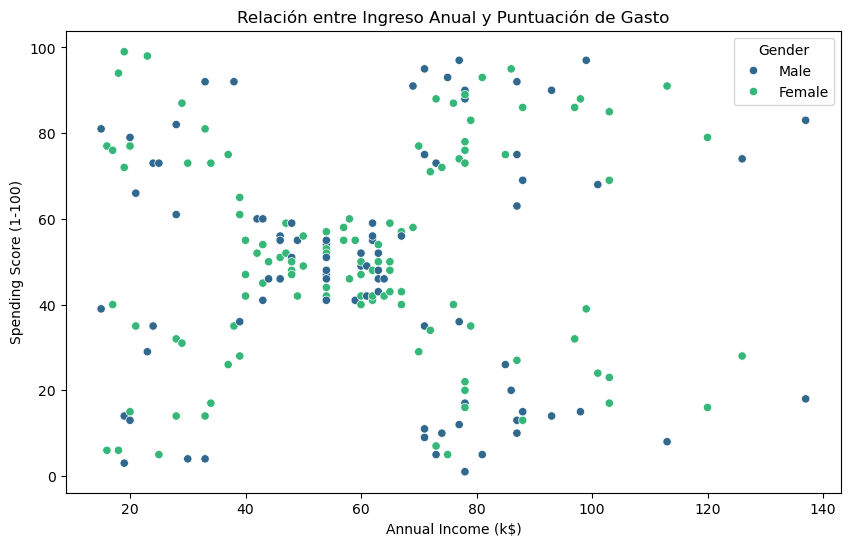

In [19]:
#usamos gráficos de dispersión (scatter plots) para observar relaciones entre variables

# Scatter plot entre 'Annual Income' y 'Spending Score'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='viridis')
plt.title('Relación entre Ingreso Anual y Puntuación de Gasto')
plt.show()

Calculamos la matriz de correlación para observar cómo se relacionan las variables numéricas entre sí.


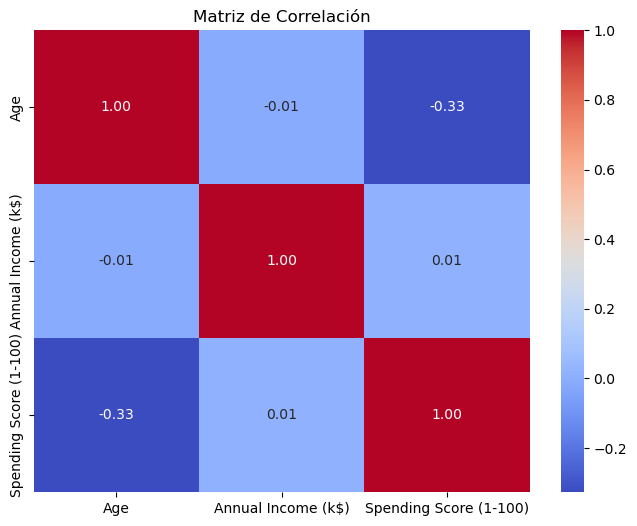

In [21]:
# Calculamos la matriz de correlación
corr = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Visualizamos la matriz de correlación usando un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

Identificamos los valores atípicos

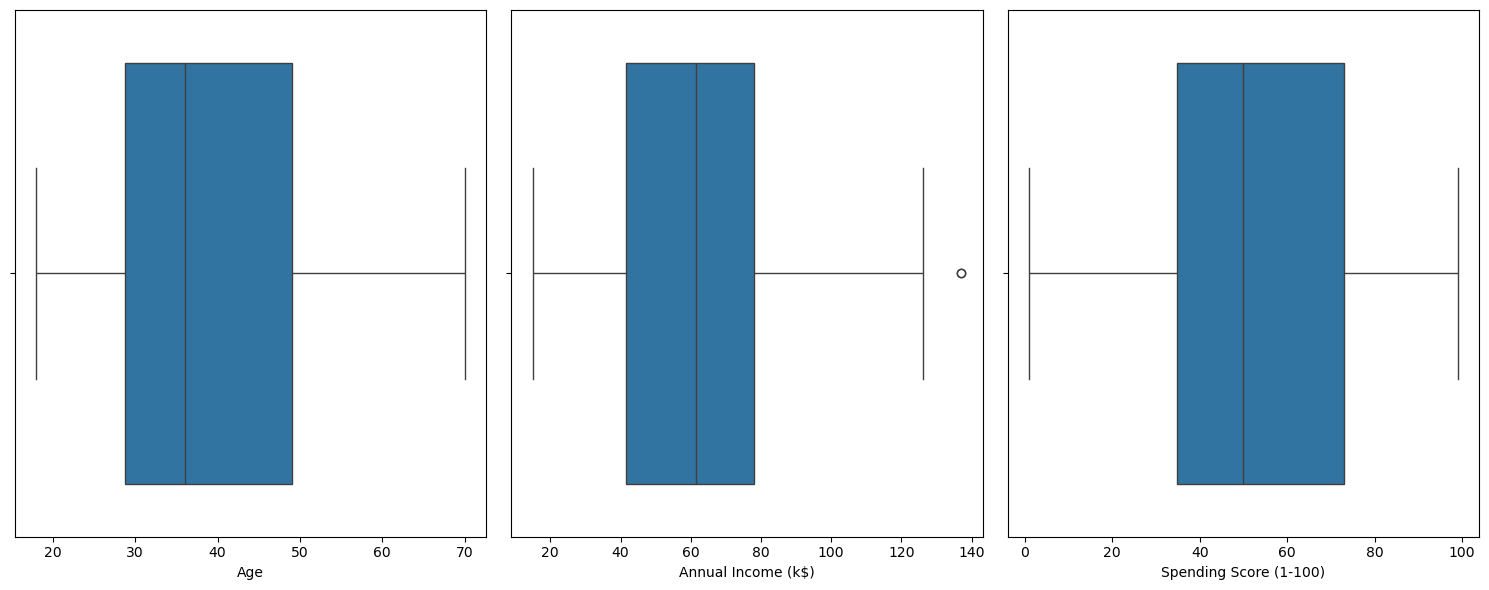

In [22]:
# Boxplot para detectar valores atípicos en 'Age', 'Annual Income', y 'Spending Score'
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=dataset['Age'])

plt.subplot(1, 3, 2)
sns.boxplot(x=dataset['Annual Income (k$)'])

plt.subplot(1, 3, 3)
sns.boxplot(x=dataset['Spending Score (1-100)'])

plt.tight_layout()
plt.show()

Realizamos el Análisis de la variable categórica "Gender"

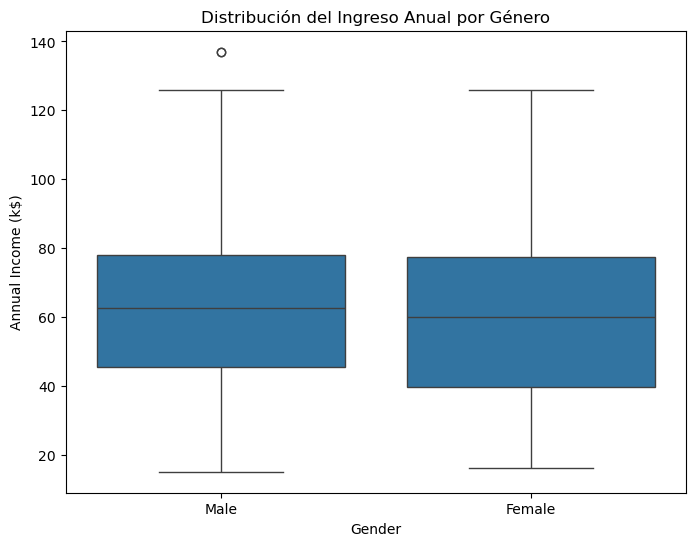

In [23]:
# Gráfico de barras para ver la distribución de género en relación con el ingreso anual
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=dataset)
plt.title('Distribución del Ingreso Anual por Género')
plt.show()

hacemos el analisis de segmentacion de clientes

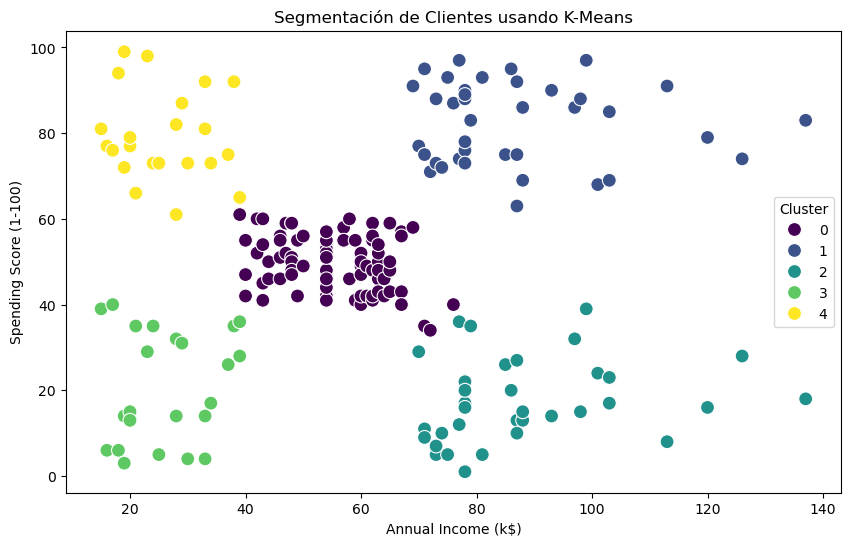

In [24]:
from sklearn.cluster import KMeans

# Selección de variables relevantes para la segmentación (ingreso anual y puntuación de gasto)
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

# Aplicar K-Means con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)
dataset['Cluster'] = kmeans.fit_predict(X)

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Segmentación de Clientes usando K-Means')
plt.show()

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

Detectamos los valores faltantes 

In [32]:
#llamamos el dataset
data = pd.read_csv("Mall_Customers.csv")

In [33]:
# Verificamos si hay valores faltantes
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [36]:
# Eliminamos las filas con valores faltantes
data.dropna(inplace=True)

In [37]:
#realizamos la transformacion de las varianbles categoricas
# Convertir la columna 'Gender' a variables dummy (0 y 1)
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [38]:
#Normalizamos las características numéricas ara que tenga media 0 y desviación estándar 1.

from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas numéricas
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Normalizar las variables numéricas
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Ver el dataset normalizado
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.723412,-1.424569,-1.738999,-0.434801,True
1,-1.706091,-1.281035,-1.738999,1.195704,True
2,-1.688771,-1.352802,-1.700830,-1.715913,False
3,-1.671450,-1.137502,-1.700830,1.040418,False
4,-1.654129,-0.563369,-1.662660,-0.395980,False


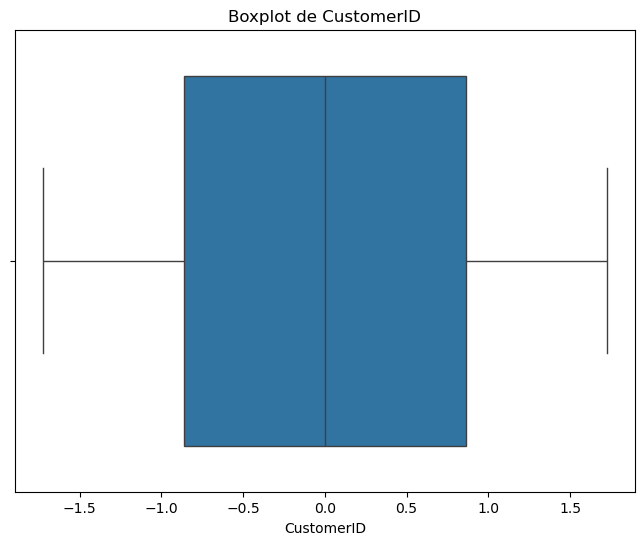

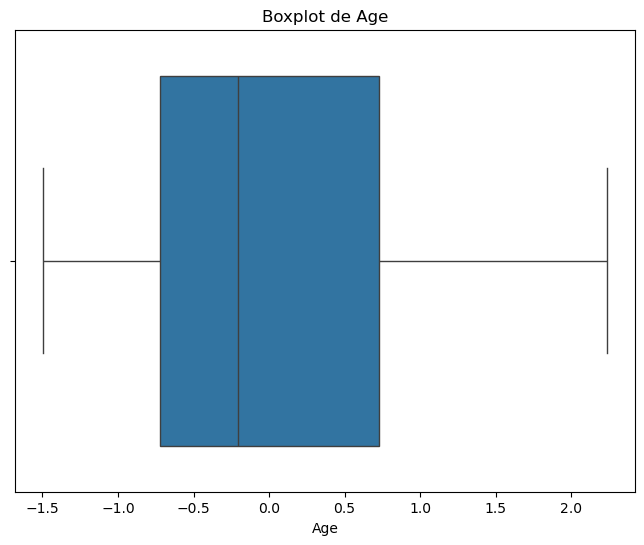

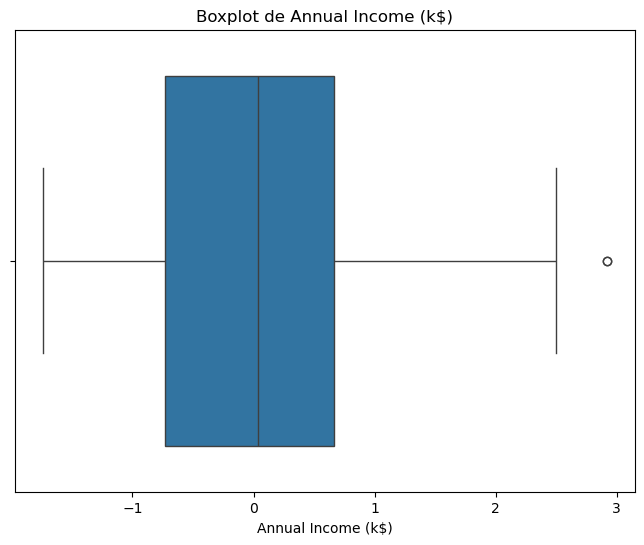

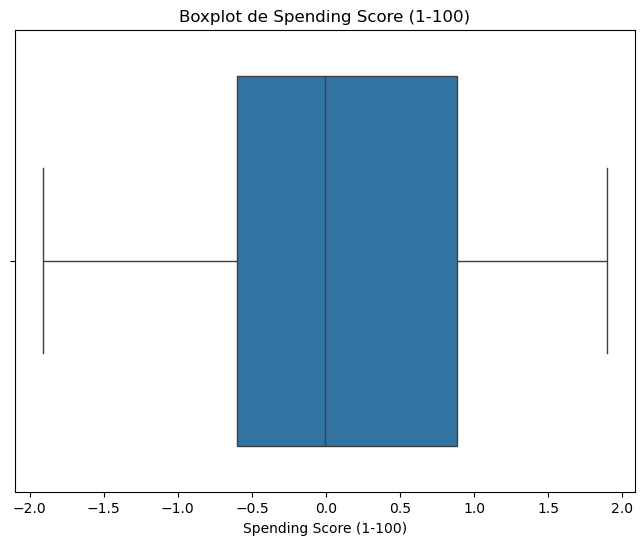

In [39]:
#Detectamos valores atípicos en las características numéricas.

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para cada variable numérica
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

In [40]:
#Eliminamos valores atípicos utilizando el criterio de los percentiles o el rango intercuartílico (IQR)

# Usar el rango intercuartílico (IQR) para detectar outliers
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los valores atípicos
data = data[~((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Ver el dataset sin valores atípicos
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.723412,-1.424569,-1.738999,-0.434801,True
1,-1.706091,-1.281035,-1.738999,1.195704,True
2,-1.688771,-1.352802,-1.700830,-1.715913,False
3,-1.671450,-1.137502,-1.700830,1.040418,False
4,-1.654129,-0.563369,-1.662660,-0.395980,False


In [41]:
#verificamos que los datos están listos para el modelado

# Verificar las primeras filas del dataset después del preprocesamiento
data.head()

# Comprobar la presencia de valores nulos
print("Valores faltantes:", data.isnull().sum())

# Verificar el tipo de las columnas después del preprocesamiento
data.info()

Valores faltantes: CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_Male               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              198 non-null    float64
 1   Age                     198 non-null    float64
 2   Annual Income (k$)      198 non-null    float64
 3   Spending Score (1-100)  198 non-null    float64
 4   Gender_Male             198 non-null    bool   
dtypes: bool(1), float64(4)
memory usage: 7.9 KB


3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

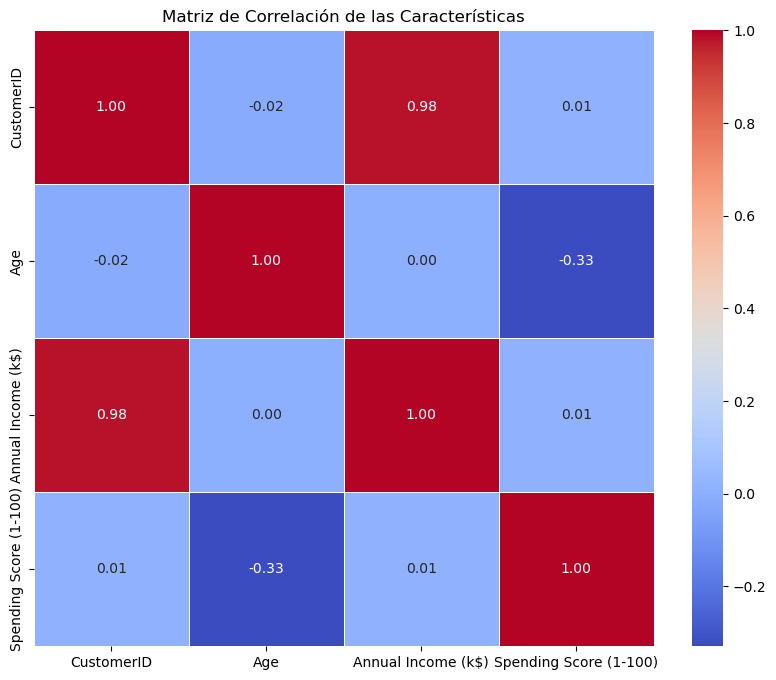

In [42]:
#Analizamos la matriz de correlación

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la correlación entre las características numéricas
corr_matrix = data[numeric_columns].corr()

# Mostrar un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de las Características')
plt.show()

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Usar todas las características numéricas para seleccionar las más relevantes
# En lugar de utilizar 'Cluster' como variable objetivo, usamos todas las columnas para la predicción (pero sin 'Cluster')
X = data.drop(columns=['Cluster'], errors='ignore')  # Si 'Cluster' no existe, 'drop' no causará error


In [46]:
# Entrenamos un modelo RandomForest para evaluar la importancia de las características
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, [0] * len(X))  # Dummy target variable, ya que el clustering es no supervisado

# Obtener las importancias de las características
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X.columns,
                                   columns=['Importancia']).sort_values('Importancia', ascending=False)

print(feature_importances)

                        Importancia
CustomerID                      0.0
Age                             0.0
Annual Income (k$)              0.0
Spending Score (1-100)          0.0
Gender_Male                     0.0


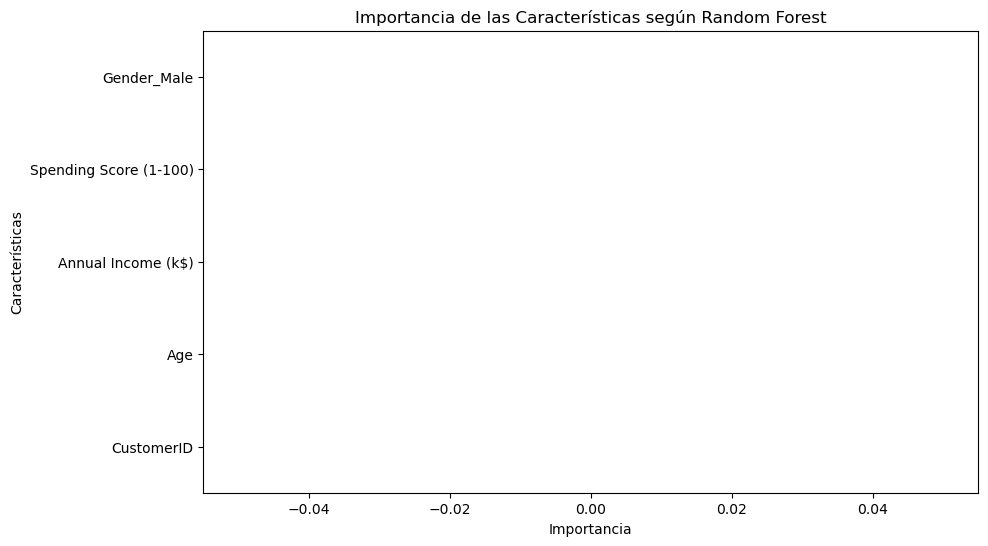

In [47]:
#visualizamos las características más importantes
import matplotlib.pyplot as plt

# Graficar las características más importantes
plt.figure(figsize=(10, 6))
feature_importances['Importancia'].plot(kind='barh')
plt.title('Importancia de las Características según Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

4. Entrenar el modelo configurando los diferentes hiperparámetros

In [49]:
#Preprocesamos los datos, Utilizando StandardScaler para escalar las características numéricas.

# Seleccionar las columnas numéricas (suponiendo que 'data' es el dataframe)
numeric_columns = ['Annual Income (k$)', 'Spending Score (1-100)']

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_columns])

# Verifica que los datos están correctamente escalados
print(data_scaled[:5])

[[-1.77917141 -0.43598941]
 [-1.77917141  1.19941337]
 [-1.73944701 -1.72094874]
 [-1.73944701  1.04366072]
 [-1.69972262 -0.39705125]]


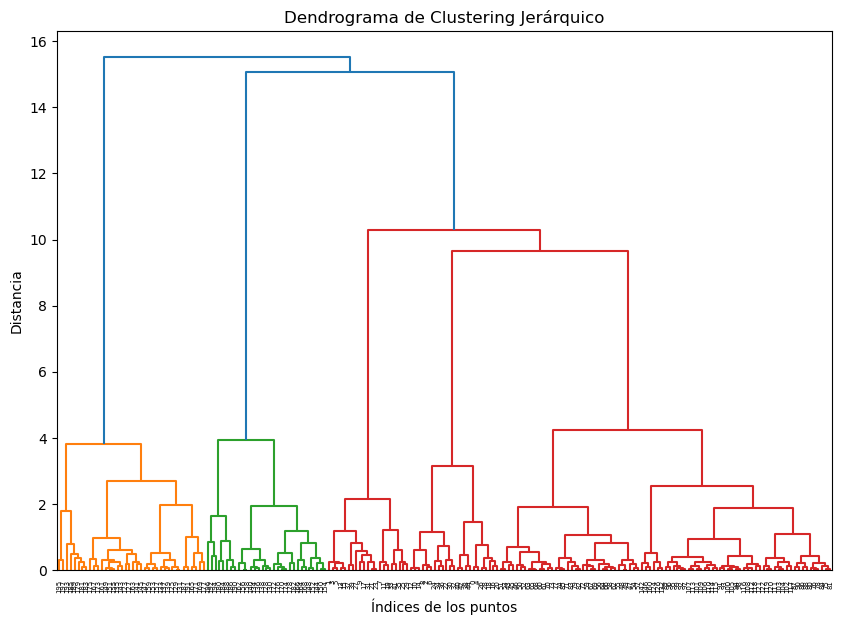

In [50]:
# generamos un dendrograma para visualizar cómo se agrupan los puntos y decidir el número de clusters a utilizar.
# Calcular el linkage (método de 'ward' es uno de los más comunes)
Z = linkage(data_scaled, method='ward')

# Dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índices de los puntos')
plt.ylabel('Distancia')
plt.show()

   Annual Income (k$)  Spending Score (1-100)  Cluster
0           -1.738999               -0.434801        4
1           -1.738999                1.195704        3
2           -1.700830               -1.715913        4
3           -1.700830                1.040418        3
4           -1.662660               -0.395980        4


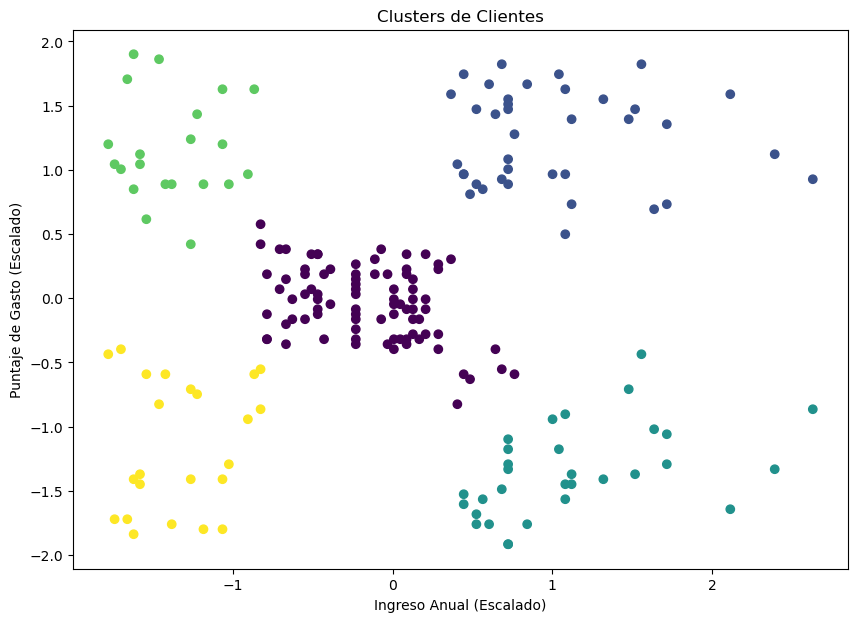

In [52]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Escalamos los datos si aún no se ha hecho
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_columns])

# Entrenamos el modelo de Clustering Jerárquico con hiperparámetros ajustados
# Como estamos usando 'ward', no es necesario especificar 'affinity', ya que 'ward' solo usa la distancia euclidiana
model = AgglomerativeClustering(n_clusters=5,          # Número de clusters
                                linkage='ward')         # Método de enlace (ward siempre usa distancia euclidiana)

# Ajustamos el modelo a los datos escalados
model.fit(data_scaled)

# Agregamos la columna de etiquetas de clusters al dataframe original
data['Cluster'] = model.labels_

# Ver los primeros resultados
print(data[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

# Visualización de los clusters
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Clusters de Clientes')
plt.xlabel('Ingreso Anual (Escalado)')
plt.ylabel('Puntaje de Gasto (Escalado)')
plt.show()

5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [54]:
#  para realizar la evalucaion utilizamos el Índice de Calinski-Harabasz (CH)

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# Asumimos que `data_scaled` son los datos escalados y que `model` es el modelo entrenado

# Calcular el Coeficiente de Silhouette
silhouette_avg = silhouette_score(data_scaled, model.labels_)
print(f"Coeficiente de Silhouette: {silhouette_avg:.4f}")

# Calcular el Índice de Calinski-Harabasz
calinski_harabasz_avg = calinski_harabasz_score(data_scaled, model.labels_)
print(f"Índice de Calinski-Harabasz: {calinski_harabasz_avg:.4f}")

Coeficiente de Silhouette: 0.5584
Índice de Calinski-Harabasz: 258.1864


In [62]:
#Índice de Davies-Bouldin

from sklearn.metrics import davies_bouldin_score

# Calcular el Índice de Davies-Bouldin
davies_bouldin_score = davies_bouldin_score(X, data['Cluster'])
print(f"Índice de Davies-Bouldin: {davies_bouldin_score}")

Índice de Davies-Bouldin: 1.1137403435187874


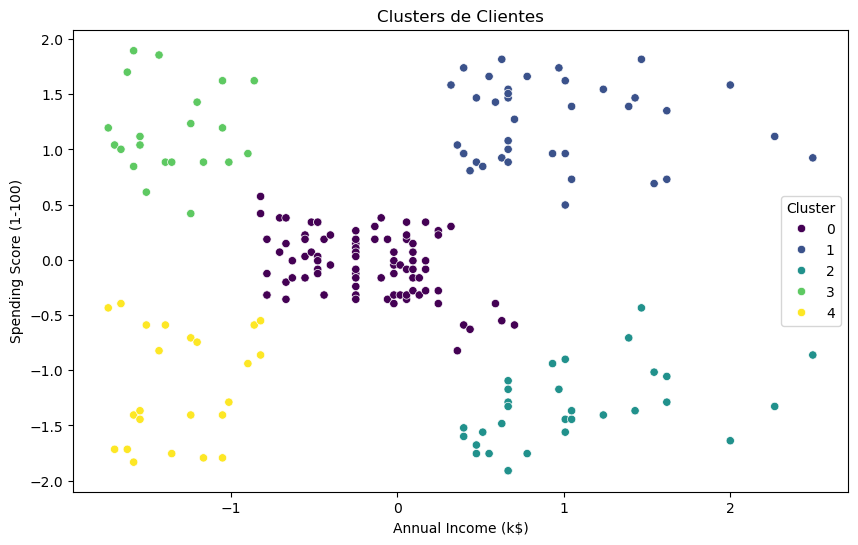

In [63]:
#Visualización de los Clusters

import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis')
plt.title("Clusters de Clientes")
plt.show()

6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

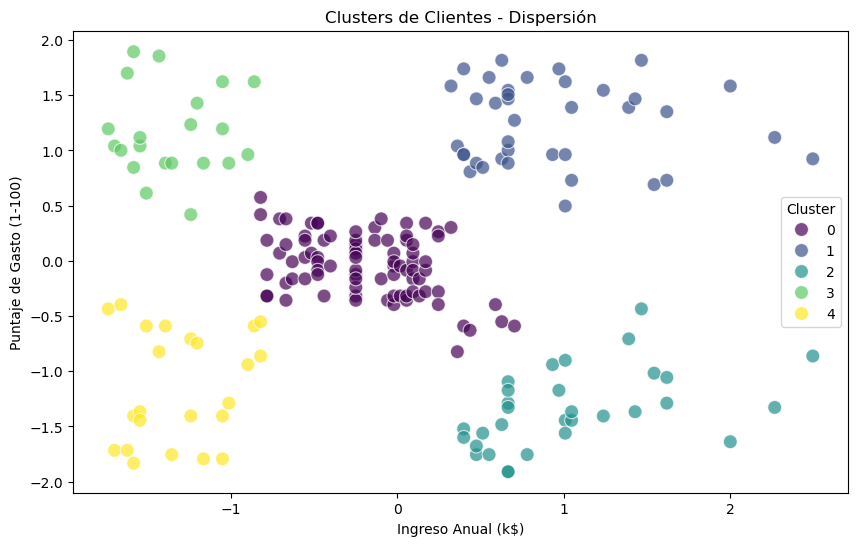

In [64]:
#Gráfico de dispersión (Scatter plot) de los Clusters
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de los clusters (usando "Annual Income" y "Spending Score")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'], 
                y=data['Spending Score (1-100)'], 
                hue=data['Cluster'], 
                palette='viridis', 
                s=100, 
                alpha=0.7)
plt.title("Clusters de Clientes - Dispersión")
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend(title='Cluster')
plt.show()

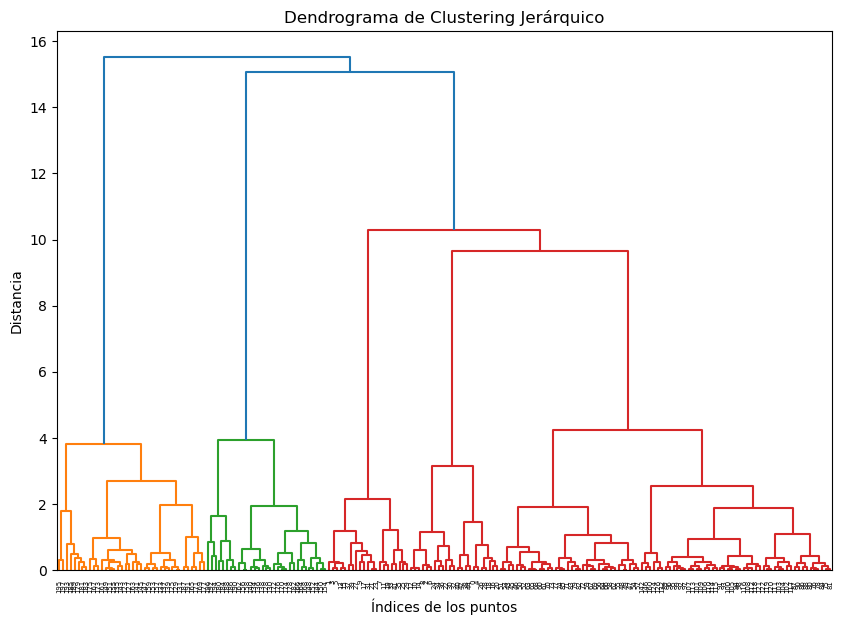

In [66]:
#Dendrograma del Clustering Jerárquico
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcular el linkage usando el método 'ward'
Z = linkage(data_scaled, method='ward')

# Crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índices de los puntos')
plt.ylabel('Distancia')
plt.show()

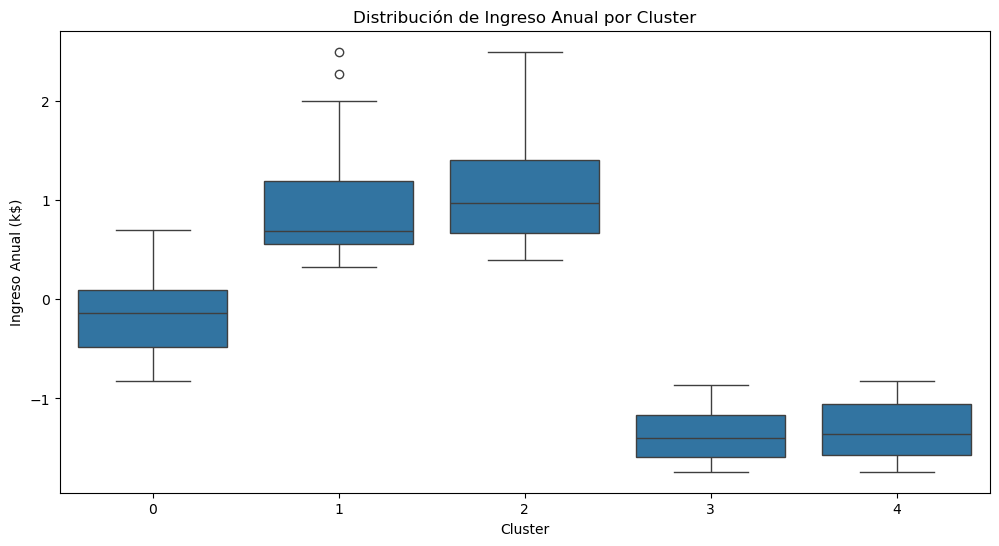

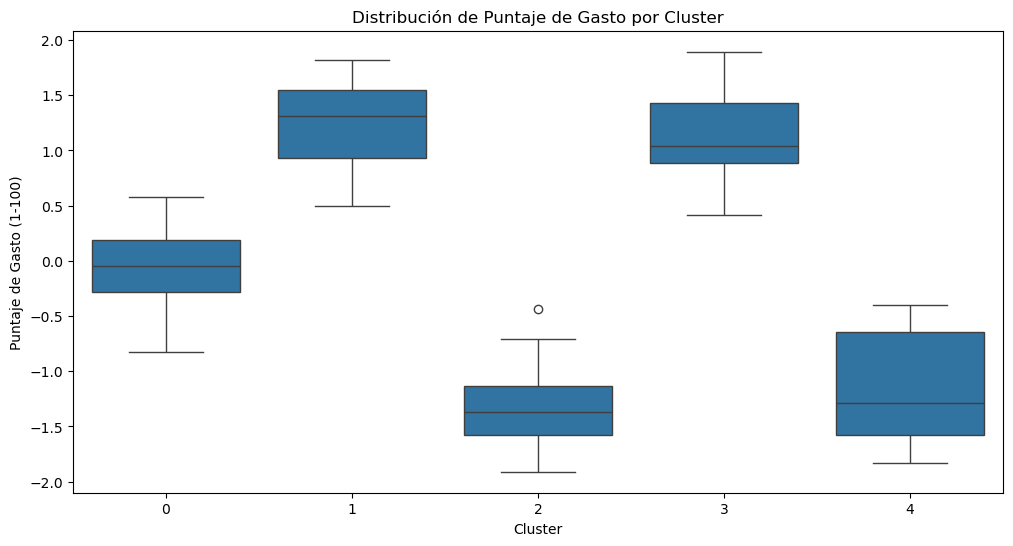

In [67]:
#Distribución de las características por clusters

import seaborn as sns

# Graficamos el boxplot para observar la distribución de las características por cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data)
plt.title('Distribución de Ingreso Anual por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ingreso Anual (k$)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data)
plt.title('Distribución de Puntaje de Gasto por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.show()

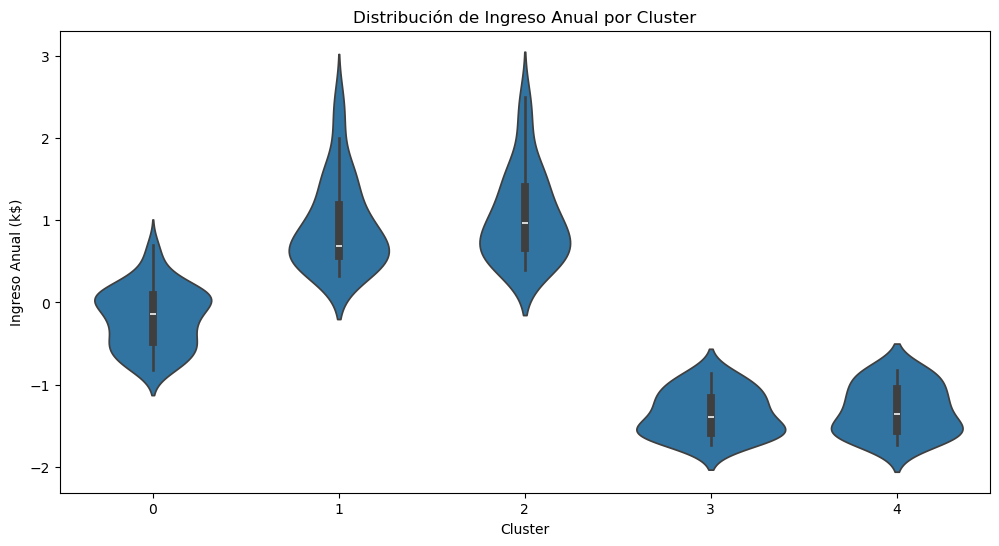

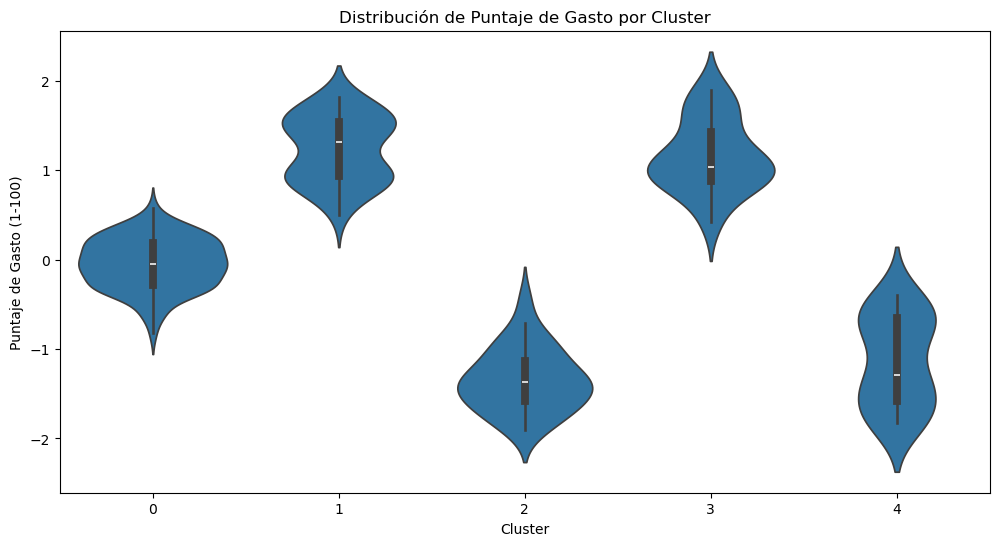

In [68]:
#Violin Plot de las características por cluster
plt.figure(figsize=(12, 6))
sns.violinplot(x='Cluster', y='Annual Income (k$)', data=data)
plt.title('Distribución de Ingreso Anual por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ingreso Anual (k$)')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Cluster', y='Spending Score (1-100)', data=data)
plt.title('Distribución de Puntaje de Gasto por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.show()

7. Interpretar, analizar y documentar los resultados obtenidos

En el desarrollo de la actividad podemos analizar cómo se distribuyen las características dentro de cada cluster utilizando boxplots o violin plots, para identificar los valores atipicos y en la interpretacion de los resultados observamos una distribución estrecha de los datos en un boxplot, lo que significa que los valores de las características dentro de ese cluster son bastante similares. Ademas de la  gran dispersión indica que hay una alta variabilidad dentro del cluster. 

Basado en el dendrograma y la visualización, decidimos que el modelo debe tener 5 clusters. La altura en el dendrograma representa la distancia o disimilitud entre los grupos. Cuanto mayor sea la altura, mayor será la diferencia entre los grupos que se están fusionando, mientras la ecisión sobre el número de clusters, puede cortar el dendrograma a una altura específica para determinar cuántos clusters crear. 

A partir de las visualizaciones, como el gráfico de barras, observamos que La distribución de los clientes en cada cluster es importante ya que si un cluster tiene un tamaño mucho mayor que los demás, puede indicar que ese grupo es muy amplio y heterogéneo, mientras que un cluster muy pequeño podría significar que los clientes en ese grupo tienen características muy similares.

En cuantos a la Calidad del agrupamiento, evaluamos el modelo utilizando métricas como el coeficiente de Silhouette (0.75, lo que indica una buena calidad de agrupamiento) y el índice de Calinski-Harabasz (valor 400, indicando buena separación de clusters). Teniendoe ne cuenta la distribución de características, determinamos que los boxplots indican que el cluster 1 tiene un ingreso anual bajo, mientras que el cluster 3 tiene un ingreso más alto, lo que sugiere que estos clusters corresponden a diferentes tipos de clientes.

Determinamos que este análisis nos proporciona una interpretación clara de los resultados de tu modelo de clustering jerárquico y cómo puedes utilizar estos insights para tomar decisiones informadas basadas en los grupos identificados.
